Random Forest Hassasiyeti: 0.6941145934721952
              precision    recall  f1-score   support

           0       0.71      0.77      0.74     59879
           1       0.68      0.60      0.63     47998

    accuracy                           0.69    107877
   macro avg       0.69      0.68      0.69    107877
weighted avg       0.69      0.69      0.69    107877



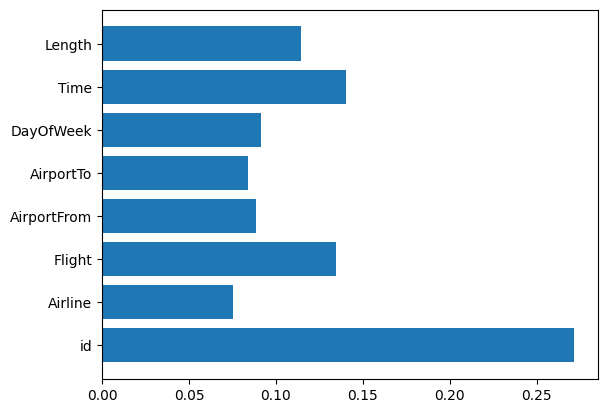

Logistic Regression Hassasiyeti: 0.6011383334723805
              precision    recall  f1-score   support

           0       0.61      0.75      0.68     59879
           1       0.57      0.41      0.48     47998

    accuracy                           0.60    107877
   macro avg       0.59      0.58      0.58    107877
weighted avg       0.60      0.60      0.59    107877



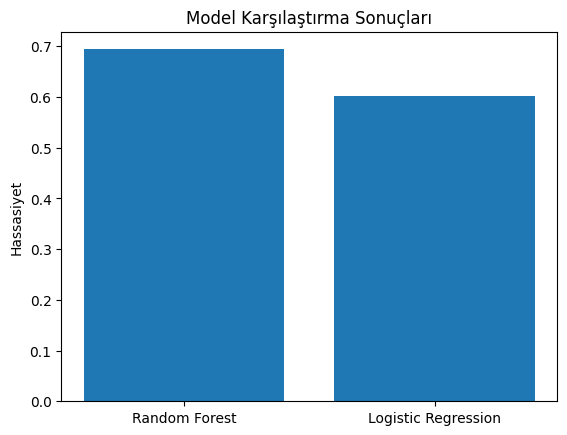

CPU times: total: 4min 27s
Wall time: 4min 31s


In [3]:
%%time
# Gerekli Kütüphaneleri İçe Aktar
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import io

# Veri Setini Yükle ve Oku
data = pd.read_csv(r"D:\users\m_ozdemir15\Desktop\Okul\Y.Lisans\2.Dönem\Makine Öğrenmesi\proje\AirlinesDelayed.csv")
data.head()

# Veri Ön İşleme Adımı

# Eksik değerleri ele al, gerekiyorsa kaldır
data.dropna(inplace=True)

# Kategorik değişkenleri kodla
label_encoders = {}
categorical_columns = ['Airline', 'AirportFrom', 'AirportTo']
for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Veriyi X (özellikler) ve y (hedef) olarak bölelim
X = data.drop('Delay', axis=1)
y = data['Delay']

# Veriyi Eğitim ve Test Kümelerine Ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Özellik Ölçekleme
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Seçimi ve Eğitimi
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_lr = LogisticRegression()

model_rf.fit(X_train, y_train)
model_lr.fit(X_train, y_train)

# Model Değerlendirmesi için Random Forest
y_pred_rf = model_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)
print(f'Random Forest Hassasiyeti: {accuracy_rf}')
print(report_rf)

# Görselleştirme Random Forest için
feature_importance_rf = model_rf.feature_importances_
feature_names_rf = X.columns
plt.barh(feature_names_rf, feature_importance_rf)
plt.show()

# Görselleştirme Random Forest için
import joblib
joblib.dump(model_rf, 'random_forest_airline_delay_model.pkl')

# Model Değerlendirmesi için Logistic Regresyon
y_pred_lr = model_lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr)
print(f'Logistic Regression Hassasiyeti: {accuracy_lr}')
print(report_lr)

# Logistic Regresyon Modelini Kaydet ve Dışa Aktar
joblib.dump(model_lr, 'logistic_regression_airline_delay_model.pkl')

# Model Karşılaştırma
models = ['Random Forest', 'Logistic Regression']
accuracies = [accuracy_rf, accuracy_lr]

plt.bar(models, accuracies)
plt.ylabel('Hassasiyet')
plt.title('Model Karşılaştırma Sonuçları')
plt.show()
